In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


Leer archivo csv

In [162]:
datos = pd.read_csv(r'C:\Users\alejo\OneDrive\Documentos\UNAD\SEMESTRE 4\ANÁLISIS DE DATOS\Tarea 3\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv')
print (datos.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   
5   64    1   0       170   227    0        2      155      0      0.6      1   
6   63    1   0       145   233    1        2      150      0      2.3      2   
7   61    1   0       134   234    0        0      145      0      2.6      1   
8   60    0   0       150   240    0        0      171      0      0.9      0   
9   59    1   0       178   270    0        2      145      0      4.2      2   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1   

Exploración de los datos

In [163]:
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Identificación de datos faltantes y atipicos y renombrando los encabezados del df

In [164]:
nuevos_nombres = {
    'age': 'edad',
    'sex': 'sexo',
    'cp': 'tipo_dolor_pecho',
    'trestbps': 'presion_arterial_reposo',
    'chol': 'colesterol',
    'fbs': 'azucar_ayunas',
    'restecg': 'resultados_electrocardiograma_reposo',
    'thalach': 'frecuencia_cardiaca_maxima',
    'exang': 'angina_inducida_ejercicio',
    'oldpeak': 'depresion_st_ejercicio',
    'slope': 'pendiente_segmento_st',
    'ca': 'num_vasos_colorados',
    'thal': 'defecto_talasemia',
    'condition': 'condicion'}
    
datos = datos.rename(columns=nuevos_nombres)
datos.describe()

,edad,sexo,tipo_dolor_pecho,presion_arterial_reposo,colesterol,azucar_ayunas,resultados_electrocardiograma_reposo,frecuencia_cardiaca_maxima,angina_inducida_ejercicio,depresion_st_ejercicio,pendiente_segmento_st,num_vasos_colorados,defecto_talasemia,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


c:\Users\alejo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Identiricación de datos faltantes y atípicos')

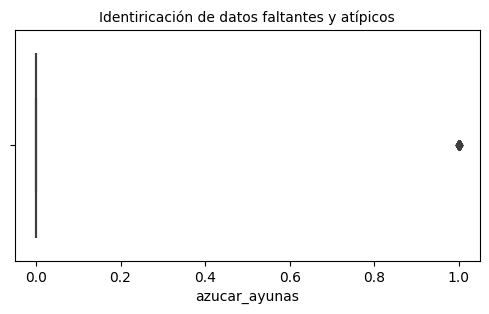

In [165]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['azucar_ayunas'])
plt.title('Identiricación de datos faltantes y atípicos', fontsize=10)

c:\Users\alejo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Identiricación de datos faltantes y atípicos')

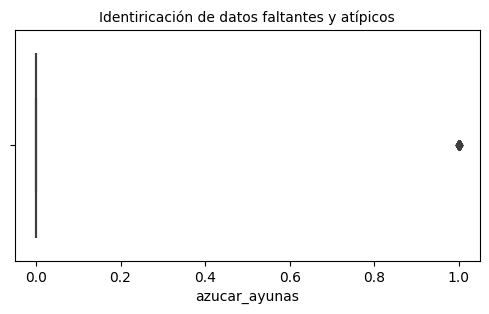

In [166]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['azucar_ayunas'])
plt.title('Identiricación de datos faltantes y atípicos', fontsize=10)

Revision de datos faltantes y atipicos en código

In [167]:
def print_zero_counts(column_name):
    counts = datos[column_name].value_counts()
    zero_count = counts[0] if 0 in counts else 0
    print(f'Cantidad de registros con cero en la variable "{column_name}":', zero_count)

print_zero_counts('edad')
print_zero_counts('sexo')
print_zero_counts('tipo_dolor_pecho')
print_zero_counts('presion_arterial_reposo')
print_zero_counts('colesterol')
print_zero_counts('azucar_ayunas')
print_zero_counts('resultados_electrocardiograma_reposo')
print_zero_counts('frecuencia_cardiaca_maxima')
print_zero_counts('angina_inducida_ejercicio')
print_zero_counts('depresion_st_ejercicio')
print_zero_counts('pendiente_segmento_st')
print_zero_counts('num_vasos_colorados')
print_zero_counts('defecto_talasemia')
print_zero_counts('condicion')

Cantidad de registros con cero en la variable "edad": 0
Cantidad de registros con cero en la variable "sexo": 96
Cantidad de registros con cero en la variable "tipo_dolor_pecho": 23
Cantidad de registros con cero en la variable "presion_arterial_reposo": 0
Cantidad de registros con cero en la variable "colesterol": 0
Cantidad de registros con cero en la variable "azucar_ayunas": 254
Cantidad de registros con cero en la variable "resultados_electrocardiograma_reposo": 147
Cantidad de registros con cero en la variable "frecuencia_cardiaca_maxima": 0
Cantidad de registros con cero en la variable "angina_inducida_ejercicio": 200
Cantidad de registros con cero en la variable "depresion_st_ejercicio": 96
Cantidad de registros con cero en la variable "pendiente_segmento_st": 139
Cantidad de registros con cero en la variable "num_vasos_colorados": 174
Cantidad de registros con cero en la variable "defecto_talasemia": 164
Cantidad de registros con cero en la variable "condicion": 160


Reemplazar todos los ceros con el valor medio  (promedio) de la columna

In [168]:
datos['sexo'] = datos['sexo'].replace(0, datos['sexo'].mean())
datos['tipo_dolor_pecho'] = datos['tipo_dolor_pecho'].replace(0, datos['tipo_dolor_pecho'].mean())
datos['azucar_ayunas'] = datos['azucar_ayunas'].replace(0, datos['azucar_ayunas'].mean())
datos['resultados_electrocardiograma_reposo'] = datos['resultados_electrocardiograma_reposo'].replace(0, datos['resultados_electrocardiograma_reposo'].mean())
datos['angina_inducida_ejercicio'] = datos['angina_inducida_ejercicio'].replace(0, datos['angina_inducida_ejercicio'].mean())
datos['depresion_st_ejercicio'] = datos['depresion_st_ejercicio'].replace(0, datos['depresion_st_ejercicio'].mean())
datos['pendiente_segmento_st'] = datos['pendiente_segmento_st'].replace(0, datos['pendiente_segmento_st'].mean())
datos['num_vasos_colorados'] = datos['num_vasos_colorados'].replace(0, datos['num_vasos_colorados'].mean())
datos['defecto_talasemia'] = datos['defecto_talasemia'].replace(0, datos['defecto_talasemia'].mean())
datos['condicion'] = datos['condicion'].replace(0, datos['condicion'].mean())

Nueva revisión de los datos faltantes

In [169]:
def print_zero_counts(column_name):
    counts = datos[column_name].value_counts()
    zero_count = counts[0] if 0 in counts else 0
    print(f'Cantidad de registros con cero en la variable "{column_name}":', zero_count)

print_zero_counts('edad')
print_zero_counts('sexo')
print_zero_counts('tipo_dolor_pecho')
print_zero_counts('presion_arterial_reposo')
print_zero_counts('colesterol')
print_zero_counts('azucar_ayunas')
print_zero_counts('resultados_electrocardiograma_reposo')
print_zero_counts('frecuencia_cardiaca_maxima')
print_zero_counts('angina_inducida_ejercicio')
print_zero_counts('depresion_st_ejercicio')
print_zero_counts('pendiente_segmento_st')
print_zero_counts('num_vasos_colorados')
print_zero_counts('defecto_talasemia')
print_zero_counts('condicion')

Cantidad de registros con cero en la variable "edad": 0
Cantidad de registros con cero en la variable "sexo": 0
Cantidad de registros con cero en la variable "tipo_dolor_pecho": 0
Cantidad de registros con cero en la variable "presion_arterial_reposo": 0
Cantidad de registros con cero en la variable "colesterol": 0
Cantidad de registros con cero en la variable "azucar_ayunas": 0
Cantidad de registros con cero en la variable "resultados_electrocardiograma_reposo": 0
Cantidad de registros con cero en la variable "frecuencia_cardiaca_maxima": 0
Cantidad de registros con cero en la variable "angina_inducida_ejercicio": 0
Cantidad de registros con cero en la variable "depresion_st_ejercicio": 0
Cantidad de registros con cero en la variable "pendiente_segmento_st": 0
Cantidad de registros con cero en la variable "num_vasos_colorados": 0
Cantidad de registros con cero en la variable "defecto_talasemia": 0
Cantidad de registros con cero en la variable "condicion": 0


Identificación de datos atípicos

c:\Users\alejo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Identiricación de datos atípicos')

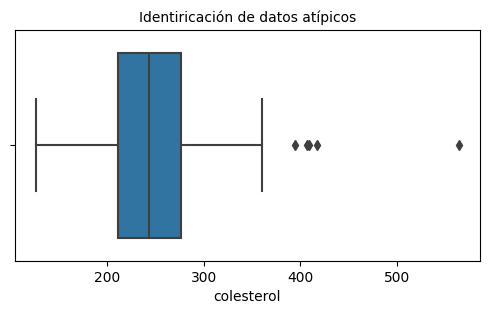

In [170]:
plt.figure(figsize=(6,3))
sns.boxplot(x=datos['colesterol'])
plt.title('Identiricación de datos atípicos', fontsize=10)


conteo de datos atípicos

In [171]:
nivel_minimo = 150
nivel_maximo = 800
total_atipicos = ((datos['colesterol'] < nivel_minimo) | (datos['colesterol'] > nivel_maximo)).sum()
print('El total de datos atipicos es {}'.format(total_atipicos))


El total de datos atipicos es 5


Filtrado de datos atípicos

In [172]:
datos = datos[(datos['colesterol'] >= nivel_minimo) & (datos['colesterol'] <= nivel_maximo)]

validar si se removieron los datos atipicos

In [173]:
total_atipicos = ((datos['colesterol'] < nivel_minimo) | (datos['colesterol'] > nivel_maximo)).sum()
print('El total de datos atipicos es {}'.format(total_atipicos))

El total de datos atipicos es 0


Revisión del tipo de datos y datos faltantes

In [174]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   edad                                  292 non-null    int64  
 1   sexo                                  292 non-null    float64
 2   tipo_dolor_pecho                      292 non-null    float64
 3   presion_arterial_reposo               292 non-null    int64  
 4   colesterol                            292 non-null    int64  
 5   azucar_ayunas                         292 non-null    float64
 6   resultados_electrocardiograma_reposo  292 non-null    float64
 7   frecuencia_cardiaca_maxima            292 non-null    int64  
 8   angina_inducida_ejercicio             292 non-null    float64
 9   depresion_st_ejercicio                292 non-null    float64
 10  pendiente_segmento_st                 292 non-null    float64
 11  num_vasos_colorados     

Total de personas diabetes

In [197]:
datos['condicion'].value_counts()

condicion
0    157
1    135
Name: count, dtype: int64

In [198]:
datos['condicion'] = datos['condicion'].round().astype(int)
datos[('condicion')].head(40)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    1
29    0
30    0
31    1
32    1
33    1
34    1
35    1
36    0
37    0
38    0
39    0
Name: condicion, dtype: int32

Porcentaje de datos para entrenamiento (train) = 75% y para prueba (test) = 25%
Creamos las variables (x) (y) para almacenar la información del entrenamiento

In [199]:
x = datos.drop('condicion', axis=1)
y = datos['condicion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 0)
print(x_train)

     edad      sexo  tipo_dolor_pecho  presion_arterial_reposo  colesterol  \
7      61  1.000000          2.158249                      134         234   
209    59  0.676768          3.000000                      174         249   
212    59  1.000000          3.000000                      138         271   
130    48  0.676768          2.000000                      130         275   
26     66  1.000000          1.000000                      160         246   
..    ...       ...               ...                      ...         ...   
114    53  1.000000          2.000000                      130         197   
183    63  1.000000          3.000000                      130         330   
236    56  1.000000          3.000000                      125         249   
282    43  1.000000          3.000000                      120         177   
20     40  1.000000          2.158249                      140         199   

     azucar_ayunas  resultados_electrocardiograma_reposo  \
7  

c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [200]:
print(y_train)

7      1
209    1
212    0
130    0
26     1
      ..
114    0
183    1
236    1
282    1
20     0
Name: condicion, Length: 233, dtype: int32


Modelo de regresión logística

In [201]:
modelo_regresion = LogisticRegression(solver = 'liblinear')
modelo_regresion.fit(x_train, y_train)
predict = modelo_regresion.predict(x_test)
print(y_test)
print(predict)


74     1
221    1
77     0
218    0
139    0
213    1
132    0
193    1
35     1
55     0
155    1
272    0
98     1
117    0
202    1
249    0
107    0
46     0
51     0
101    0
269    1
276    0
164    1
14     0
89     0
246    1
133    1
254    0
63     0
47     0
43     0
214    1
151    0
109    0
152    0
111    0
257    1
267    1
255    1
285    0
118    0
136    1
30     0
112    0
186    1
96     1
94     0
222    1
153    0
97     0
192    1
294    1
191    0
242    1
203    1
208    1
39     0
274    1
219    1
Name: condicion, dtype: int32
[1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1]


c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

Desempeño del modelo de regresión

In [202]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.84      0.78      0.81        27

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59



c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

matriz deconfusión del modelo (gráficas)

c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

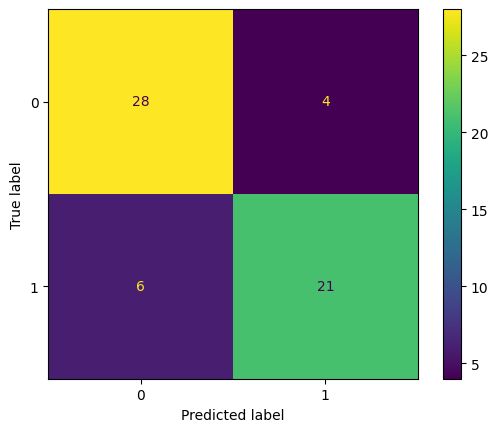

In [203]:
cm=confusion_matrix(y_test, predict)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



Curva de precisión del modelo

c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\alejo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

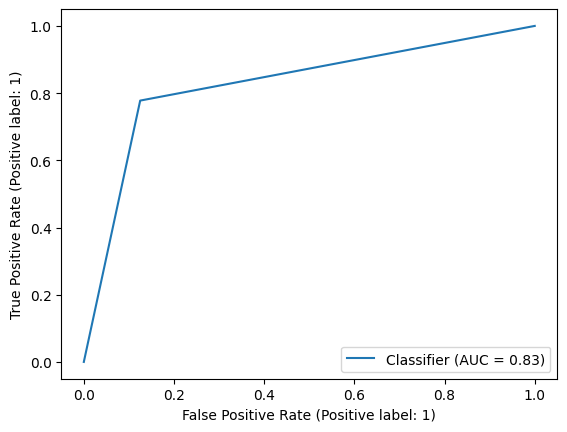

In [204]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, predict)
plt.show()